Install Libraries

In [1]:
conda install quandl

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\18179\anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:


    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    inflection-0.5.1           |   py38haa95532_0          12 KB
    quandl-3.6.1               |   py38haa95532_0          53 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  inflection         pkgs/main/win-64::inflection-0.5.1-py38haa95532_0
  quandl             pkgs/main/win-64::quandl-3.6.1-py38haa95532_0

The following packages will be UPDATED:

  conda                               4.10.1-py38haa95532_1 --> 4.10.3-py38haa95532_0

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
# Configure API key, 1st API = SsVnP6CWoxyNYLyy8grj

quandl.ApiConfig.api_key = 'gi4tJ77nixsJzLx2zLdq'

Ran API, not sure why it won't import from QUANDL?

In [6]:
#Import housing price data

df = quandl.get(YALE/RHPI)

NameError: name 'YALE' is not defined

In [9]:
df = pd.read_csv(r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\YALE-RHPI.csv", index_col = False)

In [10]:
df.head()

,Date,Index
0,2021-07-31,215.873377
1,2021-06-30,213.586849
2,2021-05-31,209.910748
3,2021-04-30,205.452803
4,2021-03-31,200.673797


In [12]:
df.shape

(886, 2)

In [14]:
df.columns

Index(['Date', 'Index'], dtype='object')

In [16]:
#reset data since both columns were index
df_1 = df.reset_index()

In [20]:
#set date as index
from datetime import datetime

df_1['datetime'] = pd.to_datetime(df_1['Date'])
df_1 = df_1.set_index('datetime')
df_1.drop(['Date'], axis = 1, inplace = True)
df_1.head()

,index,Index
datetime,,
2021-07-31,0,215.873377
2021-06-30,1,213.586849
2021-05-31,2,209.910748
2021-04-30,3,205.452803
2021-03-31,4,200.673797


In [22]:
df_1.columns

Index(['index', 'Index'], dtype='object')

In [31]:
#drop index column from df. Necessary to remove additional line from graph. 

df_1.drop(columns=['index'], inplace=True)

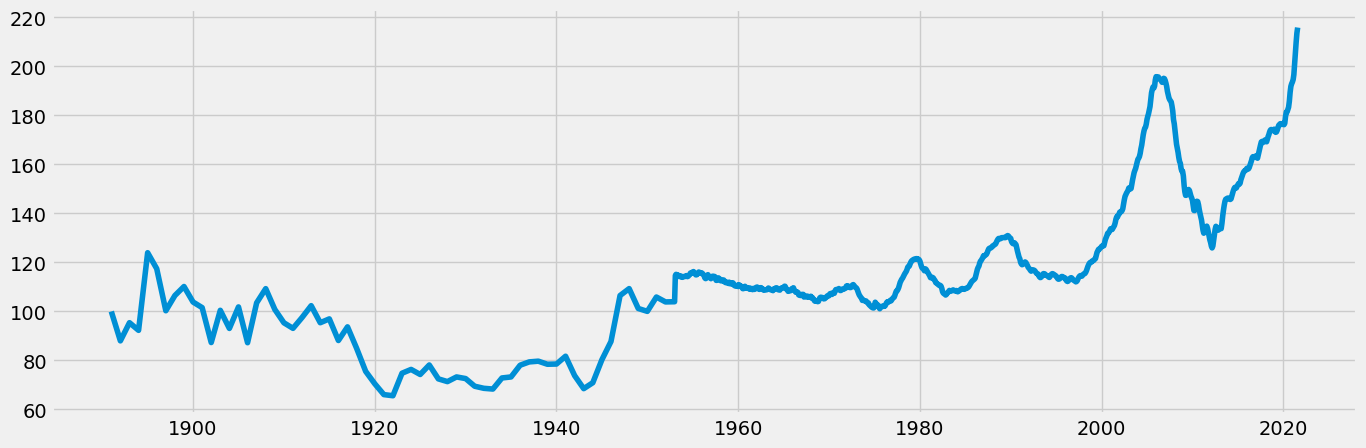

In [32]:
#Make chart using matplotlib

plt.figure(figsize=(15,5), dpi =100)
plt.plot(df_1)

In [26]:
#changing 'index' to integer from index dtype

df['Index'] = df['Index'].astype('int')

In [28]:
df.columns

Index(['Date', 'Index'], dtype='object')

Wrangling & subsetting

In [33]:
#reset index of DF
df_2 = df_1.reset_index()

In [34]:
df_2.head()

,datetime,Index
0,2021-07-31,215.873377
1,2021-06-30,213.586849
2,2021-05-31,209.910748
3,2021-04-30,205.452803
4,2021-03-31,200.673797


In [36]:
#create subset

df_sub = df_2.loc[(df_2['datetime'] >= '1980-01-01') & (df_2['datetime'] <= '2021-07-31')]

In [38]:
df_sub.tail()

,datetime,Index
494,1980-05-31,117.180268
495,1980-04-30,117.505487
496,1980-03-31,117.719846
497,1980-02-29,118.498704
498,1980-01-31,119.478311


In [39]:
#Reset datetime to index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['datetime']) #creates a datetime for 'datetime'
df_sub = df_sub.set_index('datetime') #sets datetime as index of df
df_sub.drop(['datetime'], axis = 1, inplace = True) #drops datetime non-index column
df_sub.head()

KeyError: "['datetime'] not found in axis"

In [40]:
df_sub.head()

,Index
datetime,
2021-07-31,215.873377
2021-06-30,213.586849
2021-05-31,209.910748
2021-04-30,205.452803
2021-03-31,200.673797


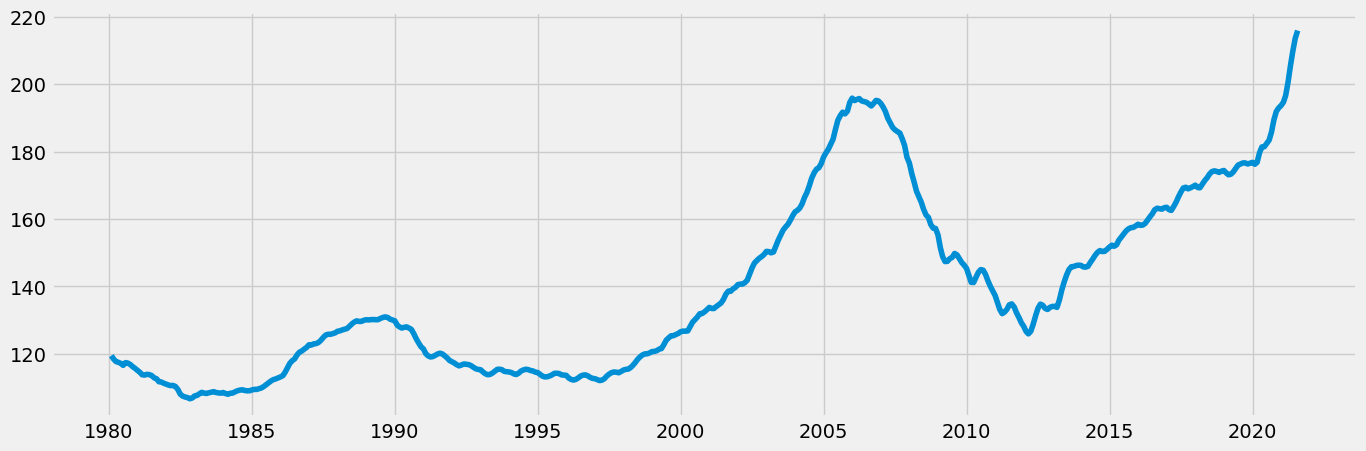

In [42]:
#Plot new datset

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_sub)

In [43]:
#missing values

df_sub.isnull().sum()

Index    0
dtype: int64

In [44]:
#duplicates
dups = df_sub.duplicated()
dups.sum()

0

DECOMPOSTION

In [49]:
#decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(df_sub, model = 'additive')

In [47]:
#define fixed size for all charts

from pylab import rcParams 
rcParams['figure.figsize'] = 18,7

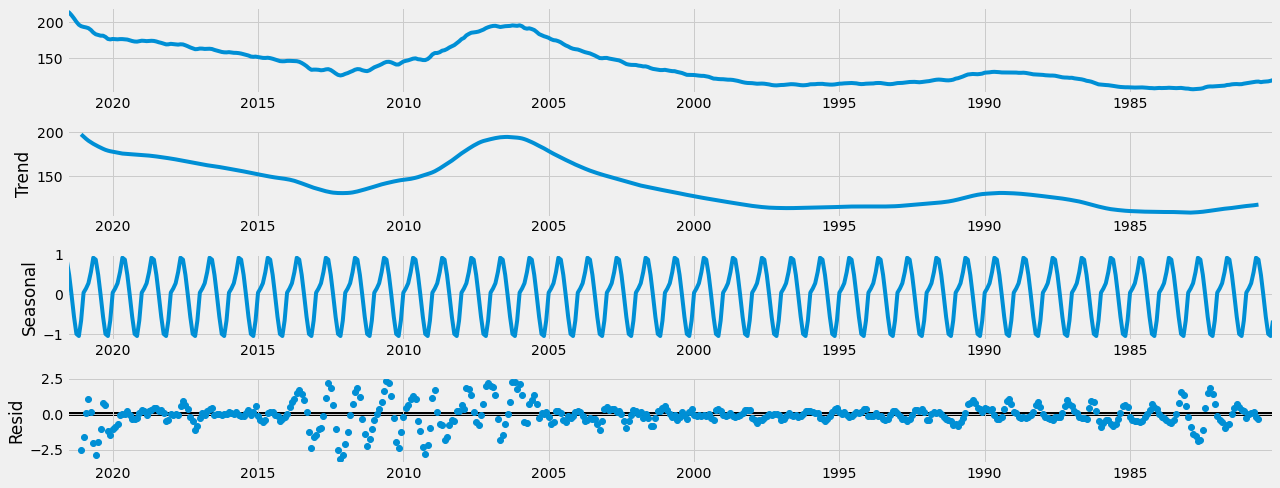

In [50]:
#plt seperate components

decomposition.plot()
plt.show()

Test for Stationarity

In [75]:
#Dickey Fuller test, import dickey-fuller function

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationary test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test statistic', 'p-value', 'Number of Lags used', 'Number of Observations used'])
    for key, index in test [4].items():
        result['Critical Value (%s)'%key] = index 
     
    print(result)  
    
dickey_fuller(df_sub['Index'])

Dickey-Fuller Stationary test:
Test statistic                  -2.274210
p-value                          0.180421
Number of Lags used             18.000000
Number of Observations used    480.000000
Critical Value (1%)             -3.444047
Critical Value (5%)             -2.867580
Critical Value (10%)            -2.569987
dtype: float64


Test statistic larger than the critical values, can't reject null hypothesis.There is a unit root, data is 
non-stationary. 

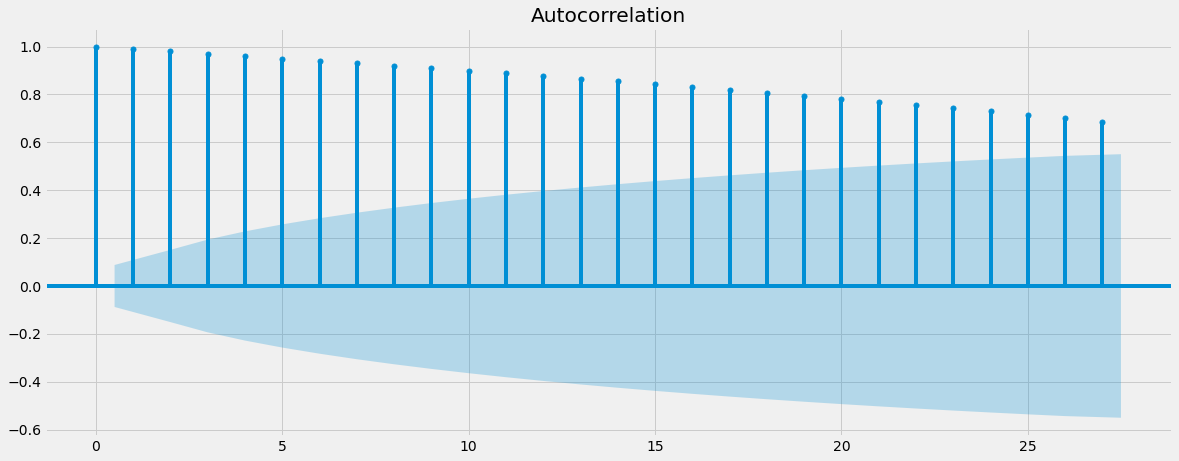

In [76]:
#Plot autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_sub)
plt.show()

all time series-lag lines go above blue shade(confidence interval), which means lags are significantly correlated with
eachother. This data is non-stationary. 

Stationarize the time Series Data

In [77]:
#the df.shift(1) makes observation t-1, which turns whole thing into t-(t-1)

df_diff = df_sub - df_sub.shift(1)

In [78]:
#Remove missing values that may result from differencing function. Required for Dickey-Fuller test

df_diff.dropna(inplace = True)

In [79]:
df_diff.head()

,Index
datetime,
2021-06-30,-2.286528
2021-05-31,-3.676101
2021-04-30,-4.457945
2021-03-31,-4.779006
2021-02-28,-4.017305


In [80]:
df_diff. columns

Index(['Index'], dtype='object')

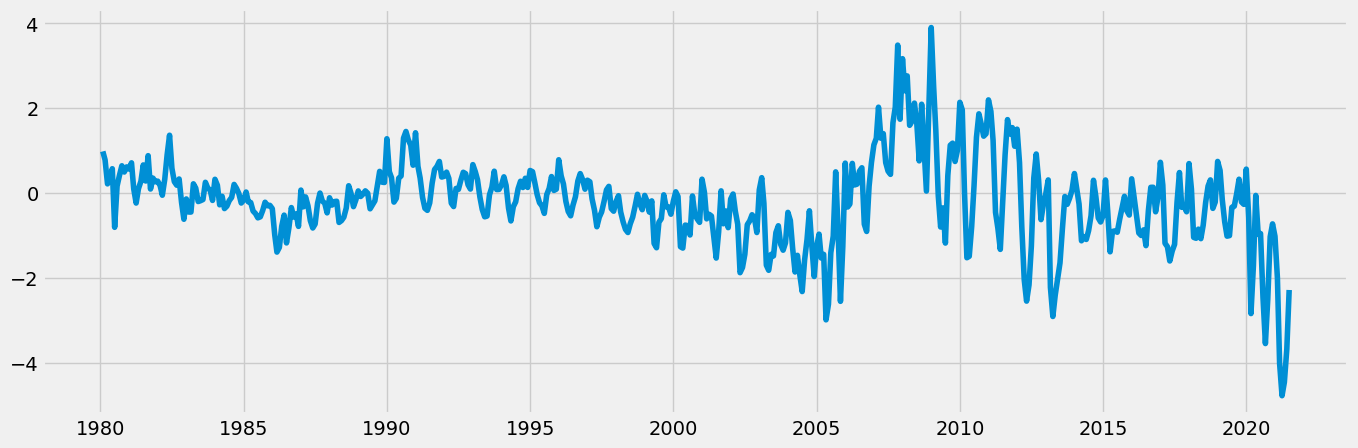

In [81]:
#Differencing changes the time-series slope

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_diff)

In [82]:
dickey_fuller(df_diff)

Dickey-Fuller Stationary test:
Test statistic                  -3.585705
p-value                          0.006040
Number of Lags used             17.000000
Number of Observations used    480.000000
Critical Value (1%)             -3.444047
Critical Value (5%)             -2.867580
Critical Value (10%)            -2.569987
dtype: float64


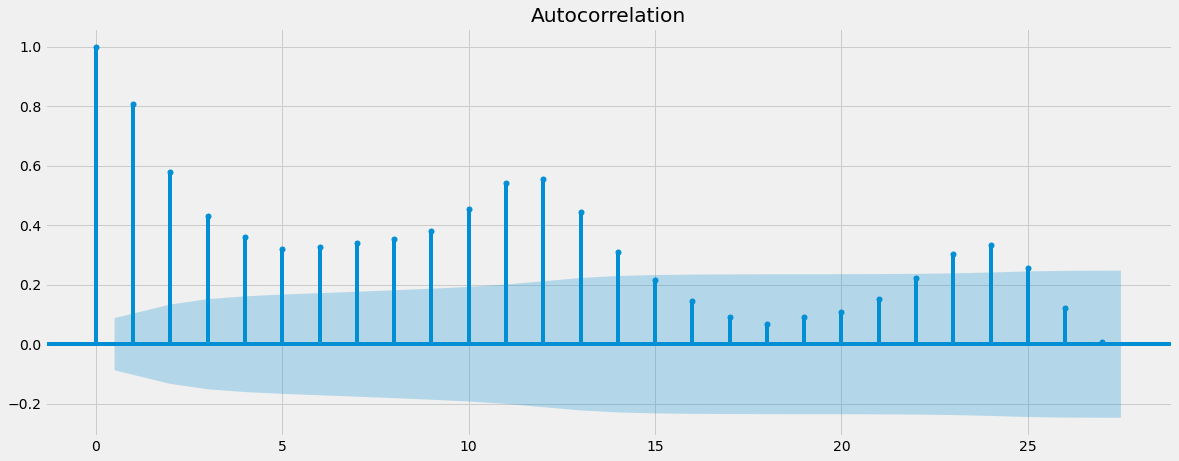

In [83]:
plot_acf(df_diff)
plt.show()

Test statistic is smaller than Critical values at all confidence intervals. Able to reject null hypothesis; 
data is now stationary, but will try another round of differencing since ther are more than 10 significant lags.

In [84]:
#second round of differencing, Find differnce between first round of differencing.
df_diff_1 = df_diff - df_diff.shift(1)

In [85]:
df_diff_1.dropna(inplace = True)

In [86]:
df_diff_1.head()

,Index
datetime,
2021-05-31,-1.389573
2021-04-30,-0.781844
2021-03-31,-0.321060
2021-02-28,0.761700
2021-01-31,2.019900


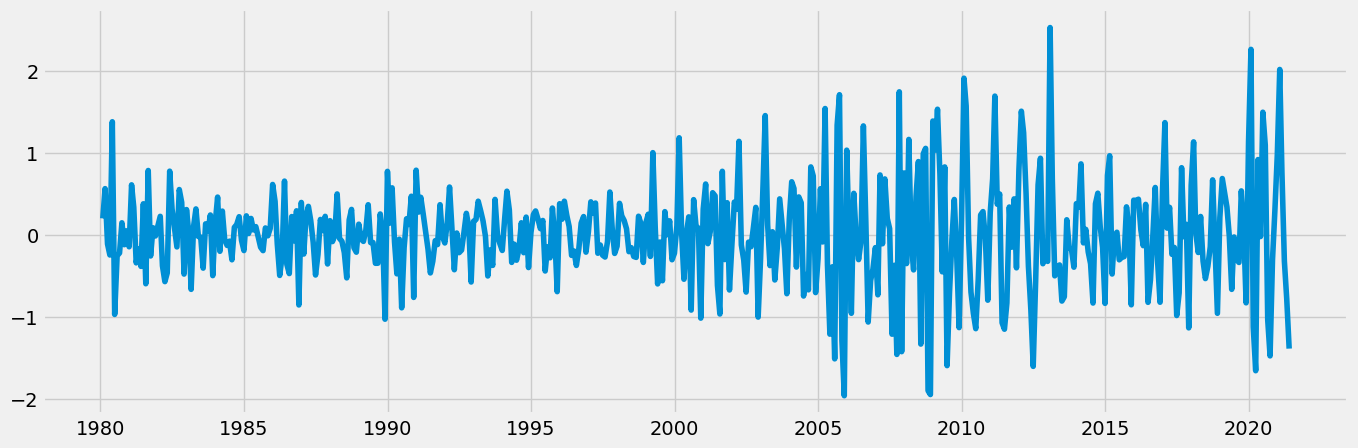

In [87]:
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_diff_1)

In [88]:
dickey_fuller(df_diff_1)

Dickey-Fuller Stationary test:
Test statistic                  -4.939386
p-value                          0.000029
Number of Lags used             16.000000
Number of Observations used    480.000000
Critical Value (1%)             -3.444047
Critical Value (5%)             -2.867580
Critical Value (10%)            -2.569987
dtype: float64


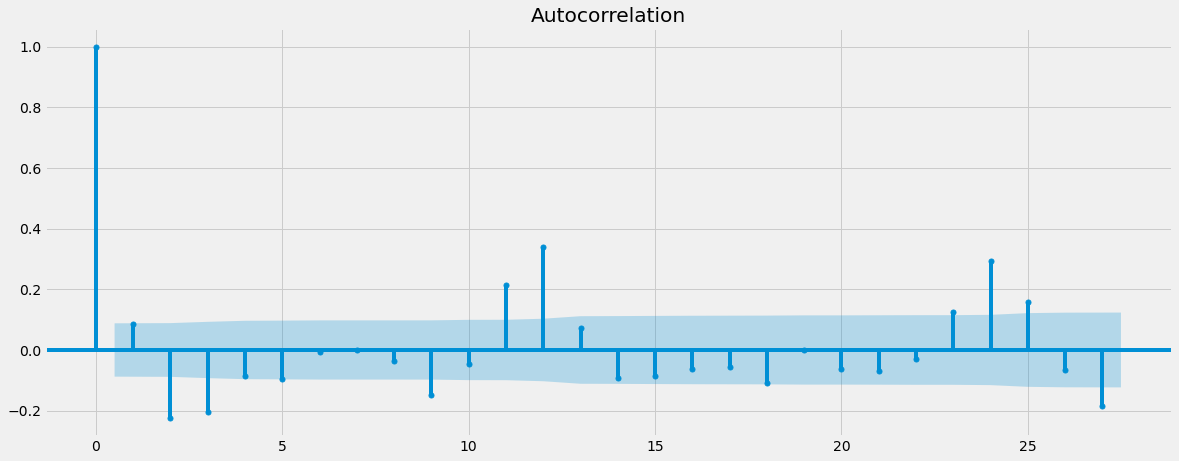

In [89]:
plot_acf(df_diff_1)
plt.show()

Seven vertical lines above the confidence interval. Sufficent for time series analysis.